# Árvore de Decisão

In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

In [5]:
df = pd.read_csv('./risco_credito.csv')
df.head()

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


Separando dados entre dados de treino e a variavel target

In [10]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

Transformando as variaveis categoricas

In [14]:
label_encoder = LabelEncoder()

In [15]:
X[:, 0] =  label_encoder.fit_transform(X[:,0])
X[:, 1] =  label_encoder.fit_transform(X[:,1])
X[:, 2] =  label_encoder.fit_transform(X[:,2])
X[:, 3] =  label_encoder.fit_transform(X[:,3])

Utilizando a Arvore de Decisao

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
tree_credit = DecisionTreeClassifier(criterion='entropy')
tree_credit.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [24]:
tree_credit.feature_importances_

array([0.41607015, 0.06408636, 0.03885431, 0.48098917])

In [25]:
tree_credit.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

Visualizando

In [26]:
import matplotlib.pyplot as plt
from sklearn import tree

[Text(0.6363636363636364, 0.9166666666666666, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(0.45454545454545453, 0.75, 'historia <= 1.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(0.36363636363636365, 0.5833333333333334, 'divida <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(0.2727272727272727, 0.4166666666666667, 'historia <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]\nclass = alto'),
 Text(0.18181818181818182, 0.25, 'renda <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]\nclass = alto'),
 Text(0.09090909090909091, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(0.2727272727272727, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.36363636363636365, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(0.45454545454545453, 0.4166666666666667, 'entropy = 0.0\nsamp

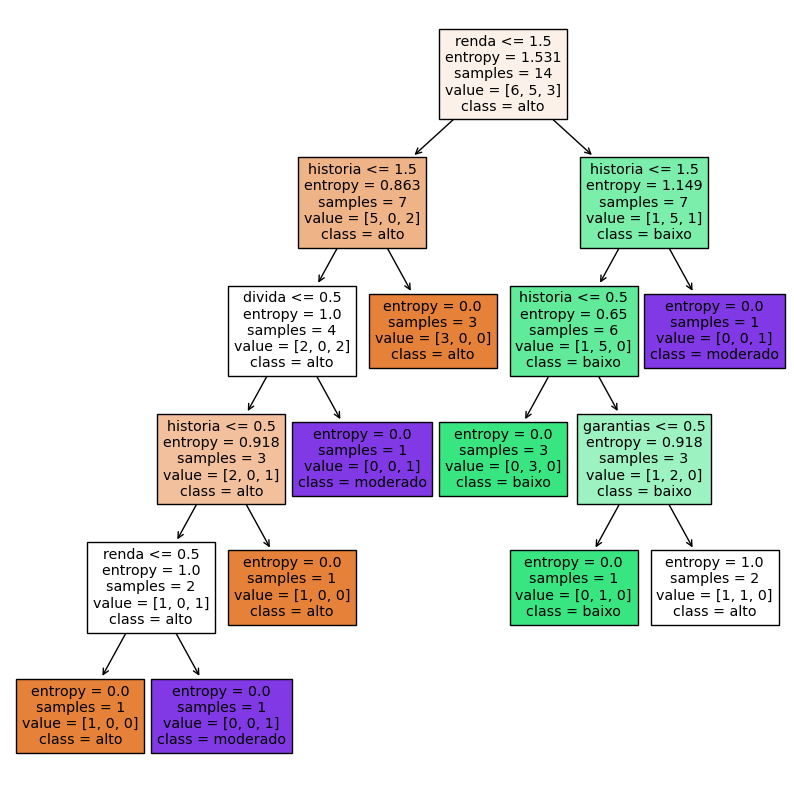

In [28]:
previsores = ['historia', 'divida', 'garantias', 'renda']
figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(tree_credit, feature_names=previsores, class_names=tree_credit.classes_, filled=True)

In [31]:
previsoes = tree_credit.predict([[0,0,1,2]])
previsoes

array(['baixo'], dtype=object)